# Housing Rental Analysis for San Francisco

Use data visualization skills, including aggregation, interactive visualizations, and geospatial analysis, to find properties in the San Francisco market that are viable investment opportunities.

* Calculate and plot the housing units per year

* Calculate and plot the average prices per square foot

* Compare the average prices by neighborhood

* Build an interactive neighborhood map

* Compose your data story

Based on the visualizations that were created:

* How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

* What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighborhoods exist that you would suggest for investment, and why?

In [33]:
# Import the required libraries and dependencies
from pathlib import Path
import pandas as pd
import hvplot.pandas as plot
import holoviews as hv

## Import the data 

In [3]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the sfo_neighborhoods_census_data.csv file from the Resources folder
file_path = Path("../fintech-boot-camp/Homework/06-Pyviz/Instructions/Starter_Code/Resources/sfo_neighborhoods_census_data.csv")
sfo_data_df = pd.read_csv(file_path)

# Review the first rows of the DataFrame
sfo_data_df.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


---

## Calculate and Plot the Housing Units per Year

Step 1: Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

In [4]:
# Create a numerical aggregation that groups the data by the year and then averages the results.
numeric_columns = sfo_data_df.select_dtypes(include = "number")
housing_units_by_year = numeric_columns.groupby("year").mean()
housing_units_by_year

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560.0,1239.0
2011,341.903429,374507.0,1530.0
2012,399.389968,376454.0,2324.0
2013,483.600304,378401.0,2971.0
2014,556.277273,380348.0,3528.0
2015,632.540352,382295.0,3739.0
2016,697.643709,384242.0,4390.0


### Step 2: Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

<Axes: title={'center': 'Quantity of Housing Units per Year'}, xlabel='Year', ylabel='Housing Units'>

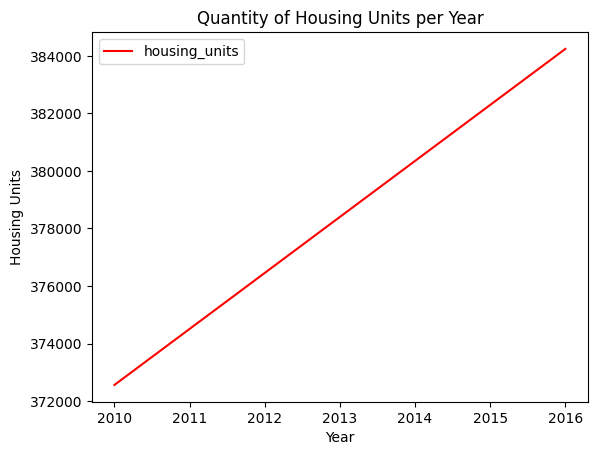

In [5]:
# Create a visual aggregation explore the housing units by year
housing_units_by_year.plot(title = "Quantity of Housing Units per Year",                           
                           xlabel = "Year",
                           y = "housing_units",
                           ylabel = "Housing Units",
                           color = "red")

# The overall trend from the years 2010 to 2016, is a steady increase in the quantity of housing units available. 

---

## Calculate and Plot the Average Sale Prices per Square Foot and Gross Rent

Use numerical and visual aggregation to calculate the average prices per square foot, and then visualize the results as a bar chart.

1. Group the data by year, and then average the results. 

2. Create a new DataFrame named `prices_square_foot_by_year`. The new DataFrame includes the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

4.  * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?



### Step 1: Group the data by year, and then average the results.

In [12]:
# Create a numerical aggregation by grouping the data by year and averaging the
# results, and round the results by two decimal points
avg_housing_units_by_year = housing_units_by_year.mean()

# Review DataFrame, and round it to two decimal points
avg_housing_units_by_year.round(2)

sale_price_sqr_foot       497.24
housing_units          378401.00
gross_rent               2817.29
dtype: float64

## The lowest gross rent reported from the years 2010 to 2016 was $1,239 in 2010.

### Step 2: Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

In [14]:
# Filter out the housing_units column, creating a new DataFrame 
# with only sale_price_sqr_foot and gross_rent averages per year

prices_square_foot_by_year = housing_units_by_year.drop(columns = ["housing_units"])
prices_square_foot_by_year

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239.0
2011,341.903429,1530.0
2012,399.389968,2324.0
2013,483.600304,2971.0
2014,556.277273,3528.0
2015,632.540352,3739.0
2016,697.643709,4390.0


### Step 3: Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

<Axes: title={'center': 'Sale Price per Sqft and Gross Rent from 2010 - 2016'}, xlabel='Year', ylabel='Price'>

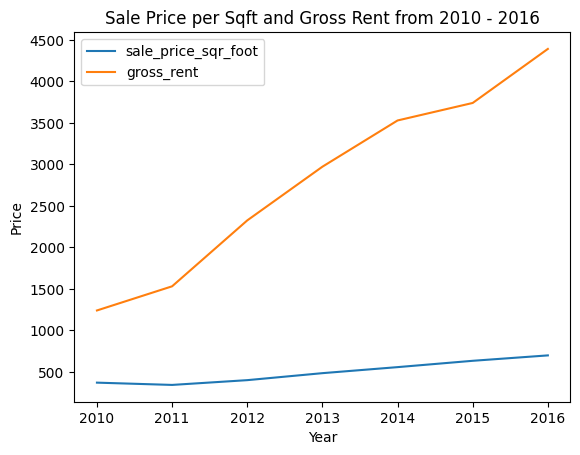

In [18]:
# Plot prices_square_foot_by_year. 
# Inclued labels for the x- and y-axes, and a title.
prices_square_foot_by_year.plot(
    title = "Sale Price per Sqft and Gross Rent from 2010 - 2016",
    xlabel = "Year",
    ylabel = "Price"
)

### There was not a drop in average sale price per square foot compared to the previous year. However, there was a slight stagnation in price from 2014 to 2015. The gross rent during this time period was still slightly increasing. 

---

## Compare the Average Sale Prices by Neighborhood

Use interactive visualizations and widgets to explore the average sale price per square foot by neighborhood. 

1. Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

4. For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 


### Step 1: Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

In [26]:
# Group by year and neighborhood and then create a new dataframe of the mean values
prices_by_year_by_neighborhood = sfo_data_df.drop(columns = ["housing_units"]).groupby(["year", "neighborhood"])
prices_by_year_by_neighborhood.mean()

sale_price_sqr_foot  gross_rent
year neighborhood                                           
2010 Alamo Square                     291.182945      1239.0
     Anza Vista                       267.932583      1239.0
     Bayview                          170.098665      1239.0
     Buena Vista Park                 347.394919      1239.0
     Central Richmond                 319.027623      1239.0
...                                          ...         ...
2016 Telegraph Hill                   903.049771      4390.0
     Twin Peaks                       970.085470      4390.0
     Van Ness/ Civic Center           552.602567      4390.0
     Visitacion Valley                328.319007      4390.0
     Westwood Park                    631.195426      4390.0

[397 rows x 2 columns]

### Step 2: Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

In [27]:
# Filter out the housing_units
#prices_by_year_by_neighborhood = prices_by_year_by_neighborhood.drop(
    #columns = "housing_units")

# Review the first and last five rows of the DataFrame
#prices_by_year_by_neighborhood.head()
# YOUR CODE HERE

### Step 3: Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.


AttributeError: Line2D.set() got an unexpected keyword argument 'groupby'

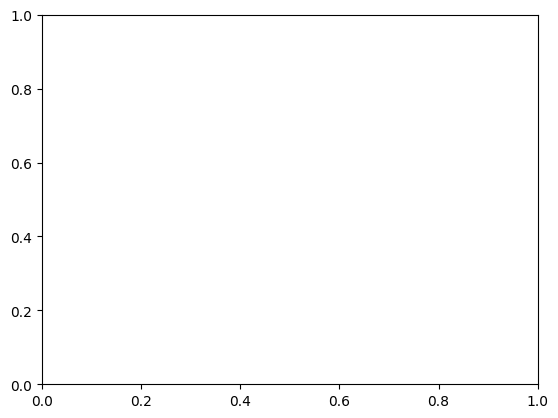

In [38]:
# Use hvplot to create an interactive line plot of the average price per square foot
# The plot should have a dropdown selector for the neighborhood
prices_by_year_by_neighborhood.plot.line(
    x = "year",
    xlabel = "Year",
    y = ["sale_price_sqr_foot", "gross_rent"],
    ylabel = "Price",
    groupby = "neighborhood"
)

For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

 YOUR ANSWER HERE

---

## Build an Interactive Neighborhood Map

Explore the geospatial relationships in the data by using interactive visualizations with hvPlot and GeoViews. To build my map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighborhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. The second cell cleans the data and sets the “Neighborhood” column. Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

4. Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighborhoods_df` DataFrame. Be sure to do the following:

    * Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?


### Step 1: Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

In [ ]:
# Load neighborhoods coordinates data
neighborhood_locations_df = # YOUR CODE HERE

# Review the DataFrame
# YOUR CODE HERE

### Step 2: Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

In [ ]:
# Calculate the mean values for each neighborhood
all_neighborhood_info_df = # YOUR CODE HERE

# Review the resulting DataFrame
# YOUR CODE HERE

### Step 3: Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. 

Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. 

The second cell cleans the data and sets the “Neighborhood” column. 

Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

In [ ]:
# Using the Pandas `concat` function, join the 
# neighborhood_locations_df and the all_neighborhood_info_df DataFrame
# The axis of the concatenation is "columns".
# The concat function will automatially combine columns with
# identical information, while keeping the additional columns.
all_neighborhoods_df = pd.concat(
    [neighborhood_locations_df, all_neighborhood_info_df], 
    axis="columns",
    sort=False
)

# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())


In [ ]:
# Call the dropna function to remove any neighborhoods that do not have data
all_neighborhoods_df = all_neighborhoods_df.reset_index().dropna()

# Rename the "index" column as "Neighborhood" for use in the Visualization
all_neighborhoods_df = all_neighborhoods_df.rename(columns={"index": "Neighborhood"})

# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())

### Step 4: Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighborhoods_df` DataFrame. Be sure to do the following:

* Set the `geo` parameter to True.
* Set the `size` parameter to “sale_price_sqr_foot”.
* Set the `color` parameter to “gross_rent”.
* Set the `frame_width` parameter to 700.
* Set the `frame_height` parameter to 500.
* Include a descriptive title.

In [ ]:
# Create a plot to analyze neighborhood info
# YOUR CODE HERE

### Step 5: Use the interactive map to answer the following question:

**Question:** Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?

**Answer:** # YOUR ANSWER HERE

## Compose Your Data Story

Based on the visualizations that you have created, compose a data story that synthesizes your analysis by answering the following questions:

How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

YOUR ANSWER HERE

What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighborhoods exist that you would suggest for investment, and why?

YOUR ANSWER HERE